In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genshin-impact-characters-dataset/genshin_characters_v1.csv


In [2]:
raw_data = pd.read_csv('/kaggle/input/genshin-impact-characters-dataset/genshin_characters_v1.csv')
raw_data.head(5)

,character_name,star_rarity,region,vision,arkhe,weapon_type,release_date,model,constellation,birthday,...,atk_1_20,def_1_20,ascension_special_stat,special_0,special_1,special_2,special_3,special_4,special_5,special_6
0,Albedo,5,Mondstadt,Geo,NaN,Sword,2020-12-23,Medium Male,Princeps Cretaceus,13-Sep,...,20,68,Geo DMG Bonus,0.00%,0.00%,7.20%,14.40%,14.40%,21.60%,28.80%
1,Alhaitham,5,Sumeru,Dendro,NaN,Sword,2023-01-18,Tall Male,Vultur Volans,11-Feb,...,24,60,Dendro DMG Bonus,0.00%,0.00%,7.20%,14.40%,14.40%,21.60%,28.80%
2,Aloy,5,NaN,Cryo,NaN,Bow,2021-09-01,Medium Female,Nora Fortis,04-Apr,...,18,53,Cryo DMG Bonus,0.00%,0.00%,7.20%,14.40%,14.40%,21.60%,28.80%
3,Amber,4,Mondstadt,Pyro,NaN,Bow,2020-09-28,Medium Female,Lepus,10-Aug,...,19,50,ATK,0.00%,0.00%,6.00%,12.00%,12.00%,18.00%,24.00%
4,Arataki Itto,5,Inazuma,Geo,NaN,Claymore,2021-12-14,Tall Male,Taurus Iracundus,01-Jun,...,18,75,CRIT Rate,0.00%,0.00%,4.80%,9.60%,9.60%,14.40%,19.20%


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 89 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   character_name           94 non-null     object
 1   star_rarity              94 non-null     int64 
 2   region                   83 non-null     object
 3   vision                   94 non-null     object
 4   arkhe                    14 non-null     object
 5   weapon_type              94 non-null     object
 6   release_date             94 non-null     object
 7   model                    94 non-null     object
 8   constellation            94 non-null     object
 9   birthday                 94 non-null     object
 10  special_dish             83 non-null     object
 11  affiliation              84 non-null     object
 12  limited                  83 non-null     object
 13  voice_en                 94 non-null     object
 14  voice_cn                 94 non-null     obj

In [4]:
columns = ['special_0', 'special_1', 'special_2', 'special_3', 'special_4',
       'special_5', 'special_6']
for col in columns:
    raw_data[col] = raw_data[col].str.replace('%', '').astype(float)

In [5]:
raw_data.describe()

,star_rarity,hp_90_90,atk_90_90,def_90_90,hp_80_90,atk_80_90,def_80_90,hp_80_80,atk_80_80,def_80_80,...,hp_1_20,atk_1_20,def_1_20,special_0,special_1,special_2,special_3,special_4,special_5,special_6
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,94.000000,94.0,94.0,94.000000,94.000000,94.000000,94.000000,94.000000
mean,4.574468,11762.000000,249.468085,698.117021,11037.010638,232.095745,649.340426,10400.510638,220.531915,617.276596,...,951.329787,19.914894,56.319149,0.0,0.0,8.047872,16.094681,16.094681,24.142553,32.192553
std,0.497074,1608.223919,54.137956,96.443962,1819.188017,50.174549,89.686617,1408.639019,47.484622,84.991891,...,113.452504,3.856734,7.523744,0.0,0.0,5.159243,10.318293,10.318293,15.477528,20.635720
min,4.000000,9189.000000,106.000000,499.000000,8553.000000,99.000000,464.000000,8144.000000,94.000000,440.000000,...,763.000000,8.000000,38.000000,0.0,0.0,4.800000,9.600000,9.600000,14.400000,19.200000
25%,4.000000,10562.500000,212.000000,628.500000,9822.250000,198.000000,584.250000,9330.250000,188.000000,556.000000,...,850.250000,18.000000,50.250000,0.0,0.0,6.000000,12.000000,12.000000,18.000000,24.000000
50%,5.000000,11537.000000,232.500000,683.000000,10732.000000,216.000000,635.000000,10216.000000,205.500000,605.000000,...,967.500000,19.000000,57.000000,0.0,0.0,6.000000,12.000000,12.000000,18.000000,24.000000
75%,5.000000,12974.750000,300.500000,764.500000,12062.250000,279.500000,710.500000,11447.500000,265.500000,674.500000,...,1030.000000,23.000000,61.750000,0.0,0.0,7.425000,14.850000,14.850000,22.275000,29.700000
max,5.000000,15674.000000,352.000000,959.000000,21080.000000,327.000000,892.000000,13829.000000,310.000000,846.000000,...,1220.000000,27.000000,75.000000,0.0,0.0,28.800000,57.600000,57.600000,86.400000,115.200000


In [6]:
raw_data.columns

Index(['character_name', 'star_rarity', 'region', 'vision', 'arkhe',
       'weapon_type', 'release_date', 'model', 'constellation', 'birthday',
       'special_dish', 'affiliation', 'limited', 'voice_en', 'voice_cn',
       'voice_jp', 'voice_kr', 'ascension_specialty',
       'ascension_boss_material', 'ascension_material_0-2',
       'ascension_material_2-4', 'ascension_material_4-6', 'ascension_gem_0-1',
       'ascension_gem_1-3', 'ascension_gem_3-5', 'ascension_gem_5-6',
       'talent_material_1-2', 'talent_material_2-6', 'talent_material_6-10',
       'talent_book_1-2', 'talent_book_2-3', 'talent_book_3-4',
       'talent_book_4-5', 'talent_book_5-6', 'talent_book_6-7',
       'talent_book_7-8', 'talent_book_8-9', 'talent_book_9-10',
       'talent_weekly', 'hp_90_90', 'atk_90_90', 'def_90_90', 'hp_80_90',
       'atk_80_90', 'def_80_90', 'hp_80_80', 'atk_80_80', 'def_80_80',
       'hp_70_80', 'atk_70_80', 'def_70_80', 'hp_70_70', 'atk_70_70',
       'def_70_70', 'hp_60_70', '

In [7]:
for col in raw_data[['star_rarity', 'region', 'vision',
                     'weapon_type','model','ascension_specialty',
                     'ascension_boss_material', 'affiliation', 'limited','ascension_special_stat']]:
    print("Column: ",col,"\n",raw_data[col].value_counts(), "\n")

Column:  star_rarity 
 star_rarity
5    54
4    40
Name: count, dtype: int64 

Column:  region 
 region
Liyue        20
Mondstadt    19
Inazuma      16
Sumeru       14
Fontaine     12
Snezhnaya     2
Name: count, dtype: int64 

Column:  vision 
 vision
Cryo       15
Pyro       15
Electro    15
Hydro      14
Anemo      13
Geo        11
Dendro     11
Name: count, dtype: int64 

Column:  weapon_type 
 weapon_type
Sword       29
Bow         17
Catalyst    17
Polearm     16
Claymore    15
Name: count, dtype: int64 

Column:  model 
 model
Medium Female    34
Medium Male      23
Tall Female      17
Tall Male        12
Short Female      8
Name: count, dtype: int64 

Column:  ascension_specialty 
 ascension_specialty
Windwheel Aster                12
Small Lamp Grass                3
Valberry                        3
Starconch                       3
Violetgrass                     3
Philanemo Mushroom              3
Qingxin                         3
Cor Lapis                       3
Cecilia  

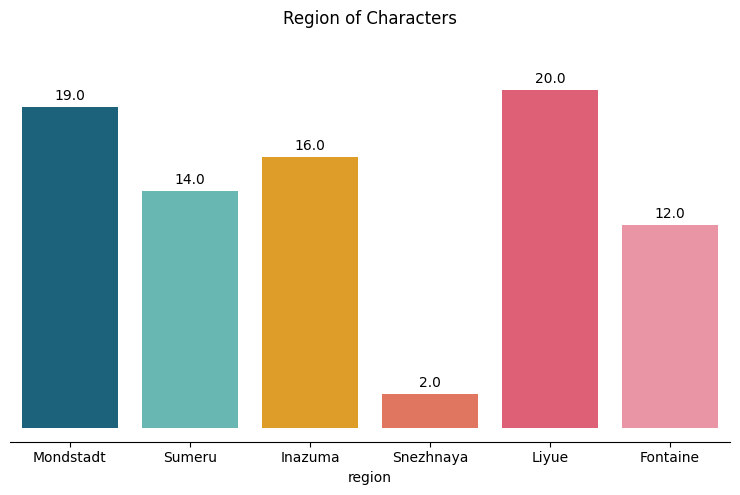

In [8]:
g = sns.catplot(data=raw_data, kind='count', x='region', height=5, aspect=1.5,
                palette= sns.color_palette(['#0c698a','#5bc4bf','#fca50a','#f5684a','#f24b69','#f7879d']))
sns.despine(top=True, right=True, left=True, bottom=False, offset=10, trim=False)
# Remove the y-axis ticks and labels
g.ax.tick_params(left=False, labelleft=False)
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 8), 
                    textcoords='offset points')

# Remove the y-axis label
g.set(ylabel='')
# Add a title
g.fig.suptitle("Region of Characters")

# Adjust layout to make room for the title
g.fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

In [9]:
def cat_plot(df, cat_col, hue_col, height, aspect, title):
    g = sns.catplot(data=df, kind='count', x=cat_col, hue=hue_col, height=height, aspect=aspect,
                palette= sns.color_palette(['#0c698a','#5bc4bf','#fca50a','#f5684a','#f24b69','#f7879d']))
    # Controlling spines/axis of the plot
    sns.despine(top=True, right=True, left=True, bottom=False, offset=6, trim=False)
    # Remove the y-axis ticks and labels
    g.ax.tick_params(left=False, labelleft=False)
    # Remove the y-axis label
    g.set(ylabel='')
    # Annotate count numbers as integers
    for ax in g.axes.flat:
        for p in ax.patches:
            count = int(p.get_height())
            ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                        textcoords='offset points')
    # Add a title
    g.fig.suptitle(title)
    plt.show()

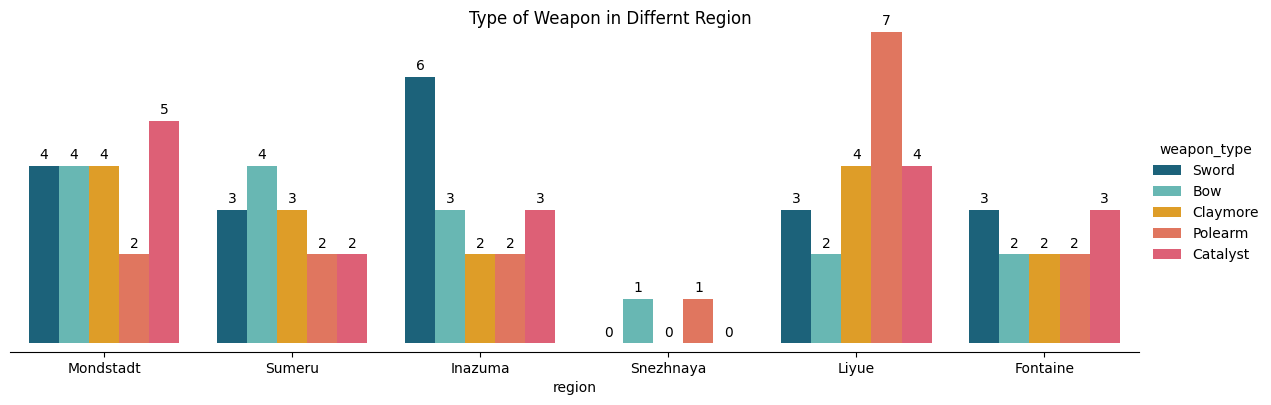

In [10]:
# Let's explore weapon_type in differnt region
plot_1 = cat_plot(raw_data, 'region', 'weapon_type', 4,3,'Type of Weapon in Differnt Region')

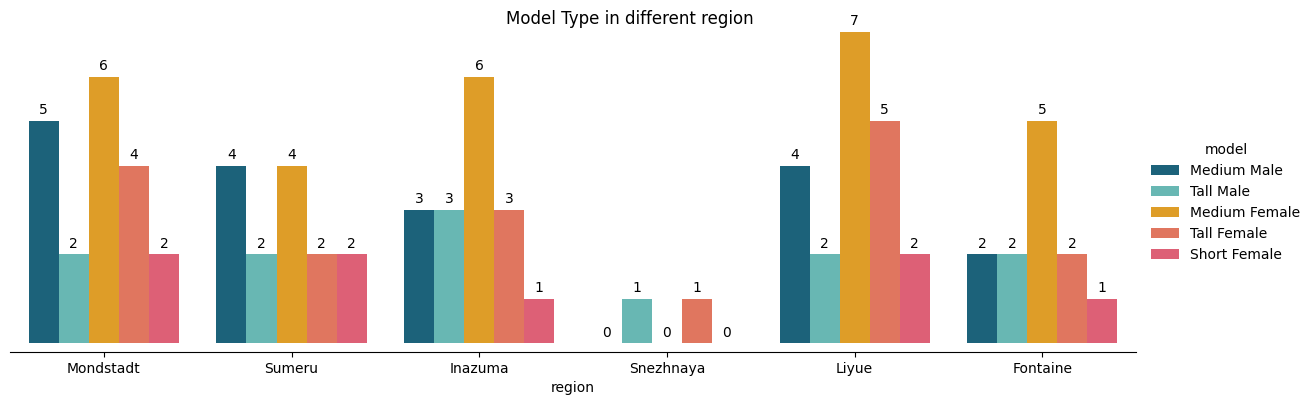

In [11]:
# Model Type in different region
plot2 = cat_plot(raw_data, 'region', 'model', 4,3,'Model Type in different region')

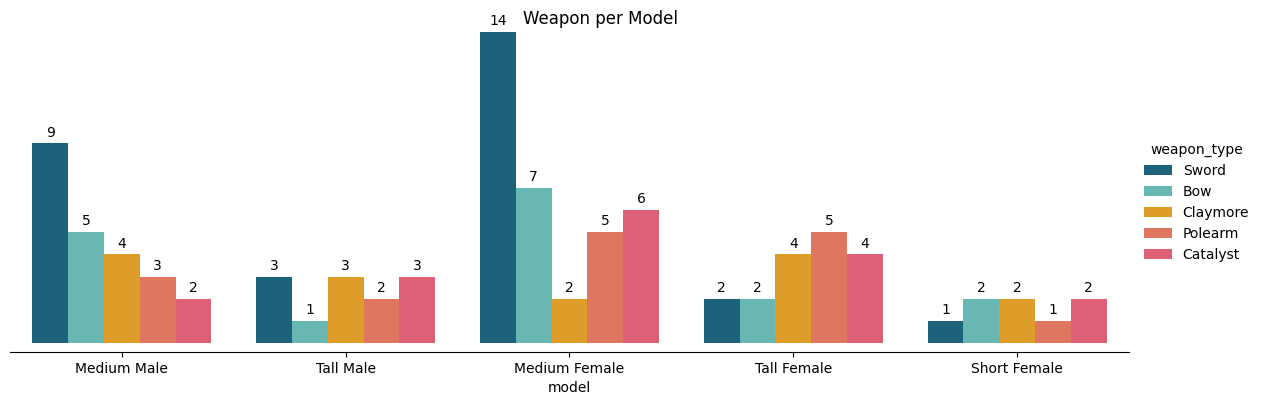

In [12]:
#Type of Weapon allocated to Model Type
plot_3 = cat_plot(raw_data, 'model', 'weapon_type', 4,3,'Weapon per Model')

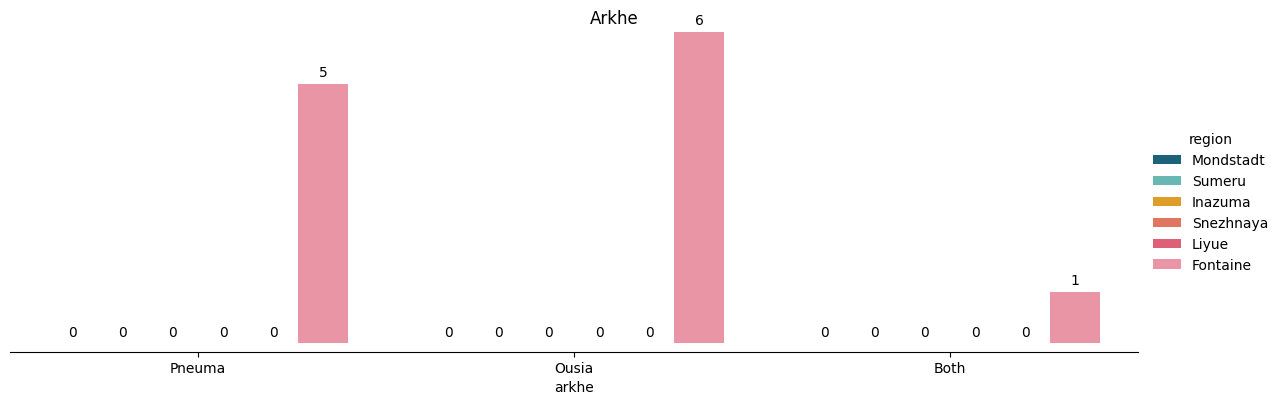

In [13]:
Plot_4 = cat_plot(raw_data, 'arkhe', 'region', 4,3,'Arkhe')

In [14]:
# Let's define a function to plot in spider diagram(radar chart) characters level improvement
def create_spider_plot(df, name_column, name,plot_color='#f24b69', title='Spider Plot'):
    # Filter the dataframe for the given name
    data = df[df[name_column] == name]

    if data.empty:
        print(f"No data found for {name}")
        return

    #Drop the name column and get the attributes
    attributes = data[['atk_90_90', 'atk_80_90', 'atk_70_80', 'def_90_90', 'def_80_90', 'def_70_80']].values.flatten()
    categories = data[['atk_90_90', 'atk_80_90', 'atk_70_80', 'def_90_90', 'def_80_90', 'def_70_80']].columns.tolist()

    #Number of variables
    num_vars = len(categories)

    # Compute angle of each axis
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]

    # Initialize the radar plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Draw one axe per variable and add labels
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([200, 400, 600, 800, 1000], ["200", "400", "600", "800", "1000"], color="grey", size=8)
    plt.ylim(0, 1000)

    # Plot data
    attributes = np.append(attributes, attributes[0])
    ax.plot(angles, attributes,color=plot_color, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, attributes, color=plot_color, alpha=0.25)

    # Add a title
    plt.title(title, size=15, color='#0c698a', y=1.1)

    plt.show()

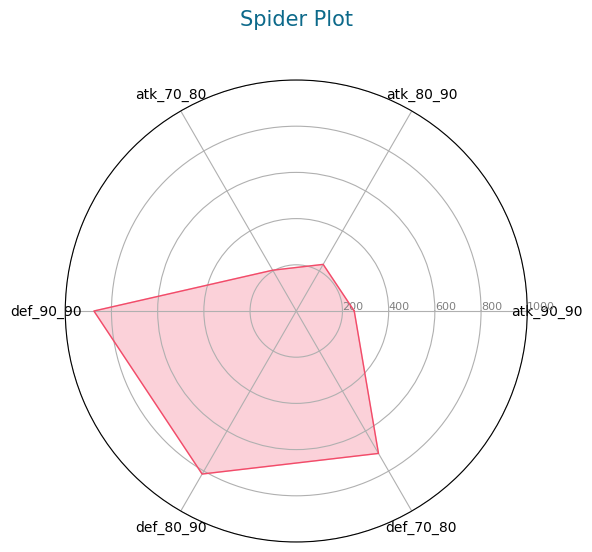

In [15]:
# Let's see first host character of Genshin Impact world
Amber = create_spider_plot(raw_data, 'character_name', 'Albedo',plot_color='#f24b69', title='Spider Plot')

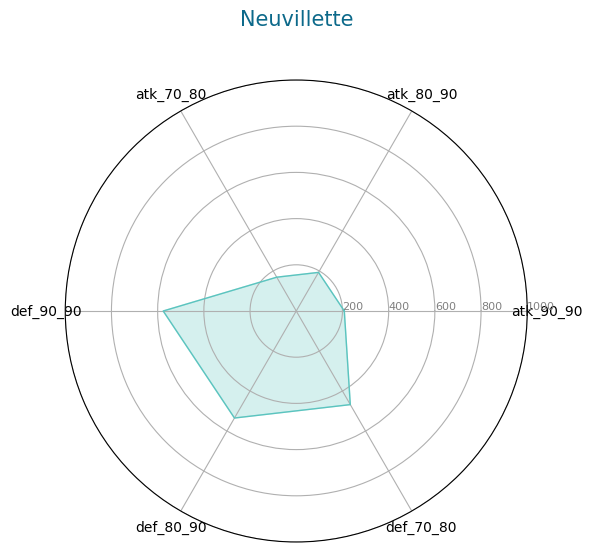

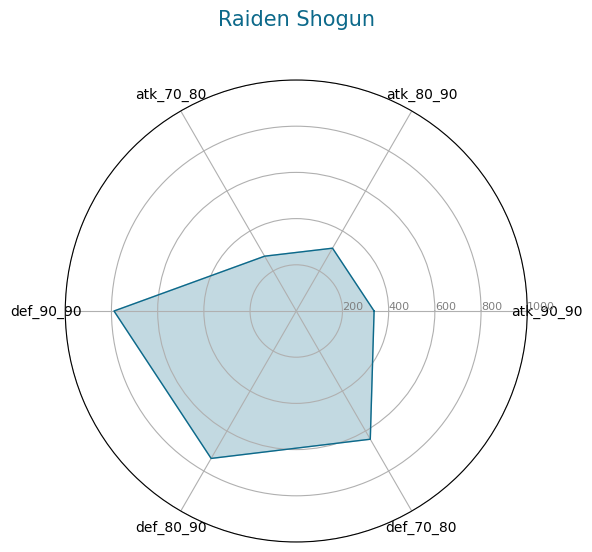

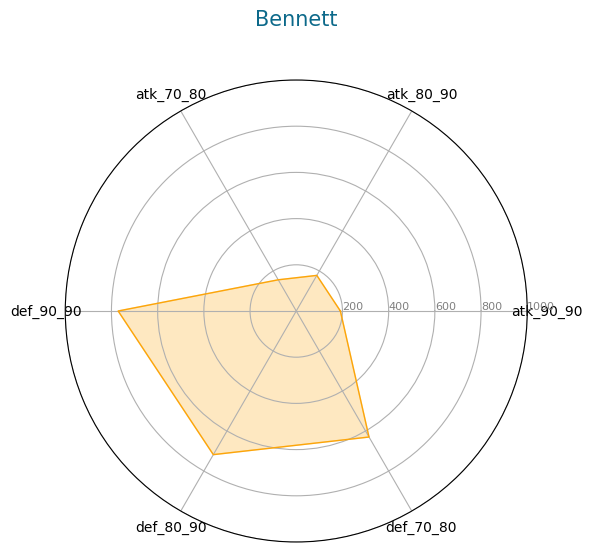

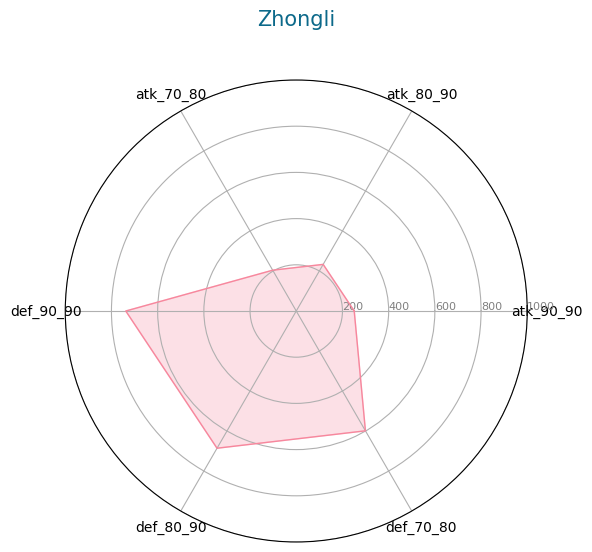

In [16]:
Neuvillette = create_spider_plot(raw_data, 'character_name', 'Neuvillette',plot_color='#5bc4bf',title='Neuvillette')
Raiden = create_spider_plot(raw_data, 'character_name', 'Raiden Shogun',plot_color='#0c698a',title='Raiden Shogun')
Bennett = create_spider_plot(raw_data, 'character_name', 'Bennett',plot_color='#fca50a',title='Bennett')
Zhongli = create_spider_plot(raw_data, 'character_name', 'Zhongli',plot_color='#f7879d', title='Zhongli')

In [17]:
def sp2to6_spider_plot(df, name_column, name,plot_color='#f24b69', title='Spider Plot'):
    # Filter the dataframe for the given name
    data = df[df[name_column] == name]

    if data.empty:
        print(f"No data found for {name}")
        return

    #Drop the name column and get the attributes
    attributes = data[['special_2', 'special_3', 'special_4','special_5', 'special_6']].values.flatten()
    categories = data[['special_2', 'special_3', 'special_4','special_5', 'special_6']].columns.tolist()

    #Number of variables
    num_vars = len(categories)

    # Compute angle of each axis
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]

    # Initialize the radar plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Draw one axe per variable and add labels
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"], color="grey", size=8)
    plt.ylim(0, 100)

    # Plot data
    attributes = np.append(attributes, attributes[0])
    ax.plot(angles, attributes,color=plot_color, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, attributes, color=plot_color, alpha=0.25)

    # Add a title
    plt.title(title, size=15, color='#0c698a', y=1.1)

    plt.show()

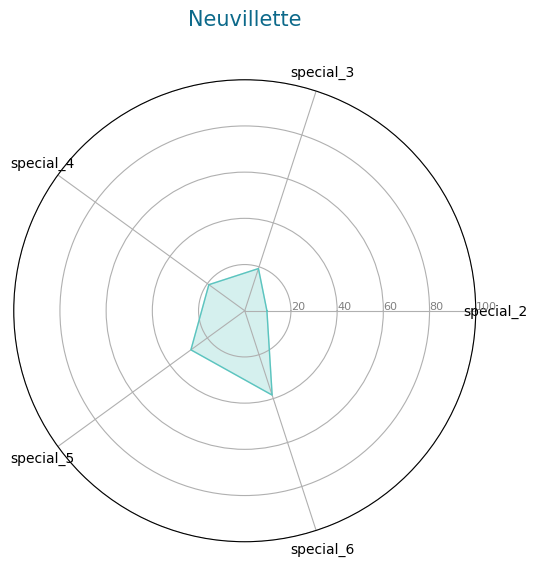

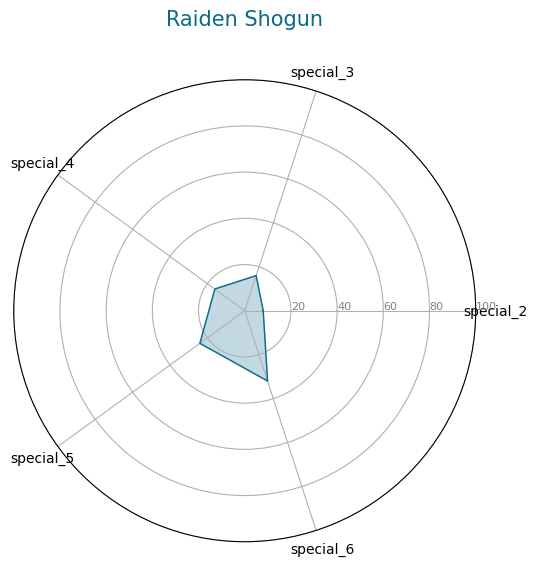

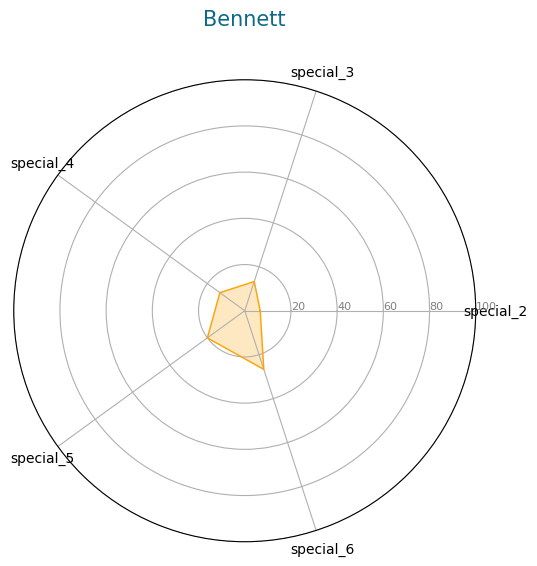

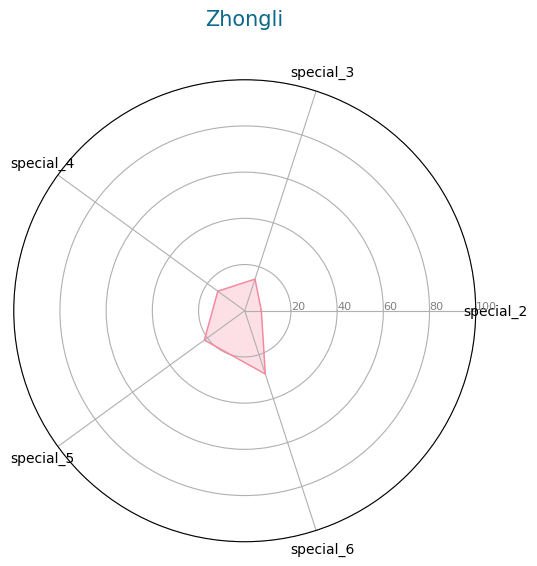

In [18]:
Neuvillette = sp2to6_spider_plot(raw_data, 'character_name', 'Neuvillette',plot_color='#5bc4bf',title='Neuvillette')
Raiden = sp2to6_spider_plot(raw_data, 'character_name', 'Raiden Shogun',plot_color='#0c698a',title='Raiden Shogun')
Bennett = sp2to6_spider_plot(raw_data, 'character_name', 'Bennett',plot_color='#fca50a',title='Bennett')
Zhongli = sp2to6_spider_plot(raw_data, 'character_name', 'Zhongli',plot_color='#f7879d', title='Zhongli')